<a href="https://colab.research.google.com/github/juanpablolopezmacias-eng/Estad-stica2025B/blob/main/Salary_dataset_Actividad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

233.55466666666666
21794977852.0
2207082.8
coeficiente de correlacion= 0.9782
coeficiente de correlacion (forma facil)=                  Unnamed: 0  YearsExperience    Salary
Unnamed: 0         1.000000         0.986460  0.960826
YearsExperience    0.986460         1.000000  0.978242
Salary             0.960826         0.978242  1.000000
coeficiente de correlacion PearsonRResult(statistic=np.float64(0.9782416184887598), pvalue=np.float64(1.1430681092271562e-20))
0.9569566641435082
PearsonRResult(statistic=np.float64(0.9782416184887598), pvalue=np.float64(1.1430681092271562e-20))
parametros: const              24848.203967
YearsExperience     9449.962321
dtype: float64


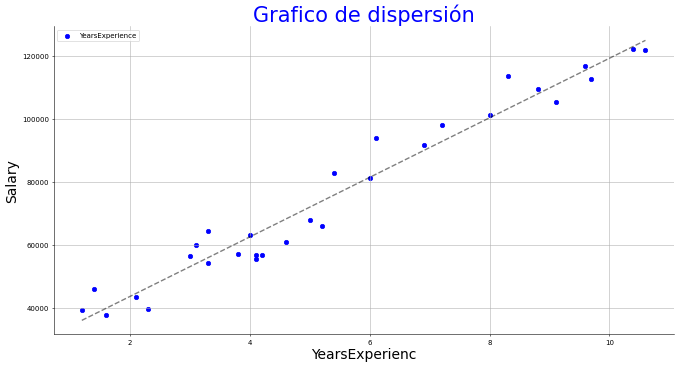


Coeficiente de determinafion= 0.957

 intervalo de confianza:                             0             1
const            20123.238035  29573.169898
YearsExperience   8674.118747  10225.805896


/tmp/ipython-input-1866133293.py:74: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


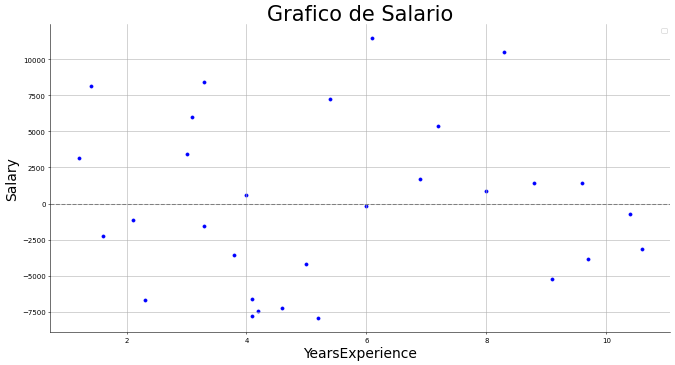

valor_p(shapiro)=  0.1952218633400829
valor_p de Breusch-Pagan: 0.5276

x=1 [34298.16628798]
x=6 [81547.97789525]

Ultimo paso


,df,sum_sq,mean_sq,F,PR(>F)
Salary,1.0,223.501695,223.501695,622.507203,1.143068e-20
Residual,28.0,10.052972,0.359035,NaN,NaN


In [14]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/juanpablolopezmacias-eng/Estad-stica2025B/refs/heads/main/CSV")
df
x=df["YearsExperience"]
y=df["Salary"]
#2) Grafico de dispersion
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8), dpi=50)
plt.scatter(x, y, label="YearsExperience", color="blue", s=40)
plt.xlabel("YearsExperienc", fontsize= 20)
plt.ylabel("Salary", fontsize= 20)
plt.title("Grafico de dispersión", color= "blue", fontsize= 30)
plt.gca().spines[["top","right"]].set_visible(False)
plt.grid()
plt.legend()
#plt.show()

#3) ¿Los datos soportan la suposición de linealidad?
#si

#4) Calcule el coeficiente de correlación e interprete el resultado.
Sxx=((x - x.mean())**2).sum()
print(Sxx)
Syy= ((y - y.mean())**2).sum()
print(Syy)
Sxy= ((x - x.mean())*(y-y.mean())).sum()
print(Sxy)
from math import sqrt
r= Sxy/sqrt(Sxx*Syy)
print("coeficiente de correlacion=", round(r,4))
print("coeficiente de correlacion (forma facil)=", df.corr())
from scipy.stats import pearsonr
print("coeficiente de correlacion", pearsonr(x,y))

#5) Calcule el coeficiente de determinación e interprete el resultado.
print(r**2)
r= pearsonr(x,y)
print(r)

#6) Obtenga la recta de regresión ajustada y grafíquelo en el gráfico de
#dispersión
import statsmodels.api as sm
x_constante=sm.add_constant(x)
x
x_constante
modelo=sm.OLS(y,x_constante).fit()
modelo.params
print("parametros:", modelo.params)
yc=modelo.predict(x_constante)
plt.plot(x, yc, color="black", linestyle="--", linewidth=2, alpha=0.5)
plt.show()

from sklearn.metrics import r2_score
r2=r2_score(y,yc)
print("\nCoeficiente de determinafion=", round(r2,4))

#7) Obtenga un intervalo de confianza del 95% para la pendiente de la recta de
#regresión ajustada
intervalo_de_confianza=modelo.conf_int(alpha=0.05)
intervalo_de_confianza
print("\n intervalo de confianza:", intervalo_de_confianza)

#8) Calcule los residuales y trace un nuevo gráfico de dispersión. Comente,
#¿Parece que se verifican los supuestos?
import matplotlib.pyplot as plt
residuales=modelo.resid
plt.figure(figsize=(16,8), dpi=50)
plt.scatter(x,residuales, color="blue",s=20)
plt.xlabel("YearsExperience", fontsize=20)
plt.ylabel("Salary", fontsize=20)
plt.title("Grafico de Salario", fontsize=30,)
plt.gca().spines[["top","right"]].set_visible(False)
plt.grid()
plt.legend()
plt.axhline(y=0,color="gray", linestyle="--")
plt.show()

#9) Realice la prueba de Shapiro para los resultados y comente el resultado.
from scipy.stats import shapiro
estadistico_shapiro, valor_p_shapiro= shapiro(residuales)
print("valor_p(shapiro)= ", valor_p_shapiro)

#10) Tes de breusch-pagan
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp:0.4f}\n')
#si hay homoscedacidad por el valor_p

#11) ¿cuáles son los resultados esperados para estos tres alumnos?
print("x=1", modelo.predict([1,1]))
print("x=6", modelo.predict([1,6]))

#12) Realice una tabla ANOVA e interprete el resultado.
print("\nUltimo paso")
from statsmodels.formula.api import ols
modelo_lineal=ols( "YearsExperience~Salary", data=df).fit()
tabla_anova=sm.stats.anova_lm(modelo_lineal)
tabla_anova